<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span>Final Project</h1>
<hr>

## Schema
- LotArea: Lot size in square feet
- Neighborhood: Physical locations within Ames city limits
- BldgType: Type of dwelling
       1Fam:	Single-family Detached	
       2FmCon:	Two-family Conversion; originally built as one-family dwelling
       Duplx:	Duplex
       TwnhsE:	Townhouse End Unit
       TwnhsI:	Townhouse Inside Unit
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MasVnrArea: Masonry veneer area in square feet
- TotalBsmtSF: Total square feet of basement area
- CentralAir: Central air conditioning
- 1stFlrSF: irst Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
- KitchenAbvGr: Kitchens above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageType: Garage location
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SalePrice: Dollar amount unit sold for
- Siding: Exterior covering on house

The outline to follow has been included down below. Each topic has the steps included with a blank cell, feel free to create as many new cells to keep your code separated.

Extra challenge:  If you want to make a categorical prediction, create a new column and bin the SalePrice into three categories (small, medium and large) then remove the SalePrice and try to predict that new column.

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Exploratory Analysis</h1>
<hr>

### First, let's import libraries and load the dataset.

In [4]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [5]:
# read in csv
df = pd.read_csv('./house.csv')

# 1. Basic information

In [12]:
df.shape

(1460, 27)

In [13]:
df.dtypes

LotArea           int64
Neighborhood     object
BldgType         object
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
TotalBsmtSF       int64
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageType       object
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
MoSold            int64
YrSold            int64
SalePrice         int64
Siding           object
dtype: object

In [15]:
df.head()

,LotArea,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Siding
0,8450,CollgCr,1Fam,2003,2003,196.000,856,Y,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.000,2,548,2,2008,208500,VinylSd
1,9600,Veenker,1Fam,1976,1976,0.000,1262,Y,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.000,2,460,5,2007,181500,MetalSd
2,11250,CollgCr,1Fam,2001,2002,162.000,920,Y,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.000,2,608,9,2008,223500,VinylSd
3,9550,Crawfor,1Fam,1915,1970,0.000,756,Y,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.000,3,642,2,2006,140000,Wd Sdng
4,14260,NoRidge,1Fam,2000,2000,350.000,1145,Y,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.000,3,836,12,2008,250000,VinylSd


# 2. Distributions of numeric features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17c699b0>,
      dtype=object)

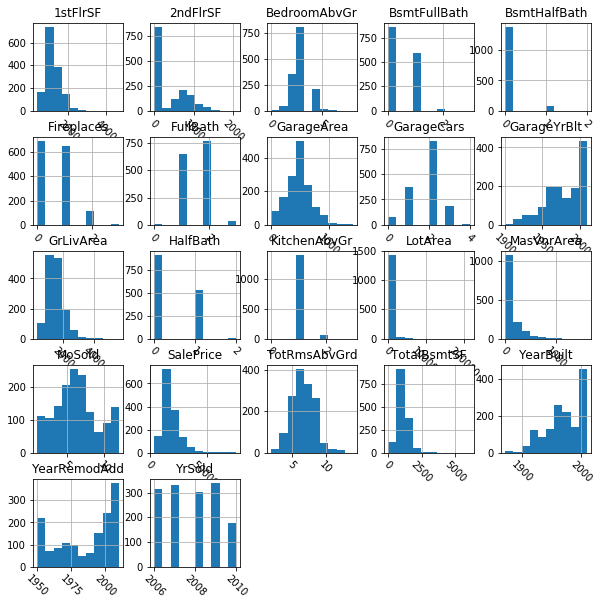

In [17]:
df.hist(xrot=-45, figsize=(10, 10))

In [19]:
df.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,10516.828,1971.268,1984.866,103.685,1057.429,1162.627,346.992,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,6.322,2007.816,180921.196
std,9981.265,30.203,20.645,181.066,438.705,386.588,436.528,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,2.704,1.328,79442.503
min,1300.000,1872.000,1950.000,0.000,0.000,334.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,1.000,2006.000,34900.000
25%,7553.500,1954.000,1967.000,0.000,795.750,882.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,5.000,2007.000,129975.000
50%,9478.500,1973.000,1994.000,0.000,991.500,1087.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,6.000,2008.000,163000.000
75%,11601.500,2000.000,2004.000,166.000,1298.250,1391.250,728.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,8.000,2009.000,214000.000
max,215245.000,2010.000,2010.000,1600.000,6110.000,4692.000,2065.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,12.000,2010.000,755000.000


# 3. Distributions of categorical features

In [18]:
df.describe(include=["object"])

,Neighborhood,BldgType,CentralAir,GarageType,Siding
count,1460,1460,1460,1379,1460
unique,25,5,2,6,15
top,NAmes,1Fam,Y,Attchd,VinylSd
freq,225,1220,1365,870,515


# 4. Segmentations

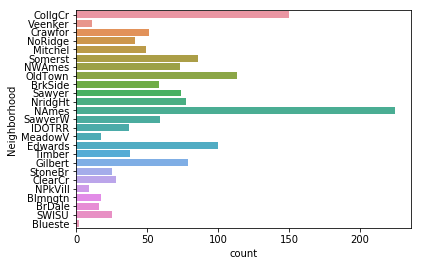

In [21]:
sns.countplot(y='Neighborhood', data=df)

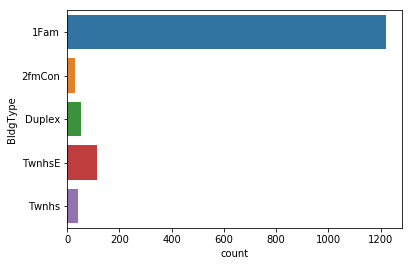

In [22]:
sns.countplot(y='BldgType', data=df)

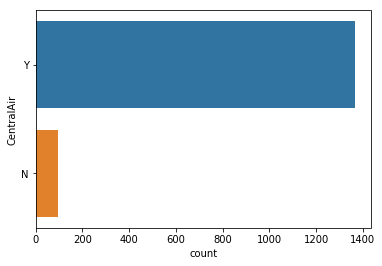

In [23]:
sns.countplot(y='CentralAir', data=df)

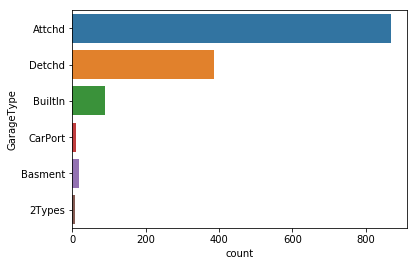

In [24]:
sns.countplot(y='GarageType', data=df)

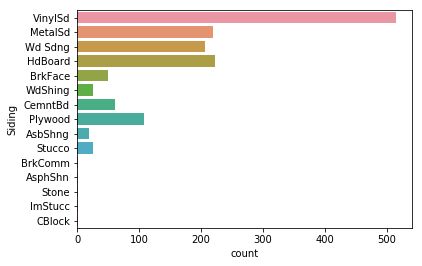

In [25]:
sns.countplot(y='Siding', data=df)

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Data Cleaning</h1>
<hr>

# 1. Drop unwanted observations

In [26]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1460, 27)
(1460, 27)


# 2. Fix structural errors

In [32]:
for column in df:
    df[column] = df[column].fillna(0)
    print(df[column].unique())

[ 8450  9600 11250 ... 17217 13175  9717]
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 19

# 3. Remove unwanted outliers

# 4. Label missing categorical data

# 5. Flag and fill missing numeric data

# 6. Save cleaned dataframe to new file

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Feature Engineering</h1>
<hr>

# 1. Start with domain knowledge

# 2. Create interaction features

# 3. Group sparse classes

# 4. Encode dummy variables

# 5. Remove unused or redundant features

# 6. Save analytical base table

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Model Training</h1>
<hr>

In [ ]:
# Scikit-Learn for Modeling

# Import Elastic Net, Ridge Regression, and Lasso Regression

# Import Random Forest and Gradient Boosted Trees


# 1. Split your dataset

# 2. Build model pipelines

# 3. Declare hyperparameters to tune

# 4. Fit and tune models with cross-validation

# 5. Evaluate models and select winner

# 6. Save the winning model